<a href="https://colab.research.google.com/github/sheilambadi/umojahack-hotspots-challenge/blob/master/UmojaHack_Hotspots_Team_Voodoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/"

In [0]:
# Extract data
# unzip -P your-password zipfile.zip

In [0]:
!ls

In [0]:
!cp "/content/drive/My Drive/Colab Notebooks/hotspot_data/train.csv" train.csv 
!cp "/content/drive/My Drive/Colab Notebooks/hotspot_data/test.csv" test.csv 
!cp "/content/drive/My Drive/Colab Notebooks/hotspot_data/SampleSubmission.csv" SampleSubmission.csv 
!cp "/content/drive/My Drive/Colab Notebooks/hotspot_data/VariableDefinitionsHotspot.csv" VariableDefinitionsHotspot.csv 

In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor

##Loading the data

In [30]:
train = pd.read_csv('train.csv', parse_dates=['date'])
train.head()

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2000-04-01,0,2000-04-01,25.447,5.296,0.003688,1250.622712,0.0,-178.916305,1250.622712,158.387765,8.000000,498.913776,2143.430034,0.0,206.935453,323.873675,2508.795159,115.989282,129.825024,590.564102,0.0,0.0,0.350169,0.0,0.649524,0.0,0.000307,0.0,0.0,2.214262,0.198996
1,1_2000-04-01,1,2000-04-01,25.669,5.293,0.000000,1238.019166,0.0,-150.779947,1238.019166,164.645065,8.104576,590.346191,2132.253953,0.0,204.835170,321.838884,2500.432319,112.619789,129.471370,611.544277,0.0,0.0,0.429049,0.0,0.570644,0.0,0.000307,0.0,0.0,3.833042,0.188071
2,2_2000-04-01,2,2000-04-01,25.443,5.074,0.000000,1240.449964,0.0,-200.503858,1240.449964,163.699542,8.027851,536.613938,2139.632626,0.0,207.001206,321.846757,2519.259344,112.378707,127.550639,594.188987,0.0,0.0,0.238300,0.0,0.761700,0.0,0.000000,0.0,0.0,1.927303,0.211730
3,3_2000-04-01,3,2000-04-01,25.665,5.070,0.000000,1229.240077,0.0,-177.011032,1229.240077,172.996043,8.820002,648.271615,2125.206979,0.0,204.127473,319.348123,2493.392613,109.132390,131.703082,645.362481,0.0,0.0,0.488146,0.0,0.511854,0.0,0.000000,0.0,0.0,1.878281,0.215403
4,4_2000-04-01,4,2000-04-01,25.886,5.067,0.000307,1224.093679,0.0,-153.256111,1224.093679,178.396749,9.000000,719.423119,2114.709813,0.0,203.295123,318.639735,2487.984467,108.161469,133.354846,660.372381,0.0,0.0,0.322243,0.0,0.677757,0.0,0.000000,0.0,0.0,1.968818,0.199975


In [11]:
train.shape

(626644, 32)

In [31]:
test = pd.read_csv('test.csv', parse_dates=['date'])
test.head(1)

,ID,area,date,lat,lon,burn_area,climate_aet,climate_def,climate_pdsi,climate_pet,climate_pr,climate_ro,climate_soil,climate_srad,climate_swe,climate_tmmn,climate_tmmx,climate_vap,climate_vpd,climate_vs,elevation,landcover_0,landcover_1,landcover_2,landcover_3,landcover_4,landcover_5,landcover_6,landcover_7,landcover_8,population_density,precipitation
0,0_2014-01-01,0,2014-01-01,25.447,5.296,0,142.756021,1217.92618,-953.401012,1360.571291,1.0,0.0,355.59369,2349.499157,0.0,187.541787,332.578998,2542.124518,111.013969,156.563945,590.564102,0.0,0.0,0.430648,0.0,0.569045,0.0,0.000307,0.0,0.0,2.773423,0.000457


In [13]:
variables = pd.read_csv('VariableDefinitionsHotspot.csv')
variables

,Variable,Description
0,ID,The IDs take the form of [area ID]_yyyy-mm-dd....
1,area,Area ID
2,date,The date that the data is aggregated over
3,lat,Latitude of the center of the area
4,lon,Longitude of the center of the area
5,burn_area,Percentage of the area burnt
6,climate_aet,"Actual evapotranspiration, derived using a one..."
7,climate_def,"Climate water deficit, derived using a one-dim..."
8,climate_pdsi,Palmer Drought Severity Index
9,climate_pet,Reference evapotranspiration (ASCE Penman-Mont...


##Descriptive Statistics of Data

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626644 entries, 0 to 626643
Data columns (total 32 columns):
ID                    626644 non-null object
area                  626644 non-null int64
date                  626644 non-null datetime64[ns]
lat                   626644 non-null float64
lon                   626644 non-null float64
burn_area             626644 non-null float64
climate_aet           626644 non-null float64
climate_def           626644 non-null float64
climate_pdsi          626644 non-null float64
climate_pet           626644 non-null float64
climate_pr            626644 non-null float64
climate_ro            626644 non-null float64
climate_soil          626644 non-null float64
climate_srad          626644 non-null float64
climate_swe           626644 non-null float64
climate_tmmn          626644 non-null float64
climate_tmmx          626644 non-null float64
climate_vap           626644 non-null float64
climate_vpd           626644 non-null float64
climate_vs 

In [15]:
# check for missing values
train.isnull().sum()

ID                        0
area                      0
date                      0
lat                       0
lon                       0
burn_area                 0
climate_aet               0
climate_def               0
climate_pdsi              0
climate_pet               0
climate_pr                0
climate_ro                0
climate_soil              0
climate_srad              0
climate_swe               0
climate_tmmn              0
climate_tmmx              0
climate_vap               0
climate_vpd               0
climate_vs                0
elevation                 0
landcover_0               0
landcover_1               0
landcover_2               0
landcover_3               0
landcover_4               0
landcover_5               0
landcover_6               0
landcover_7               0
landcover_8               0
population_density    19516
precipitation             0
dtype: int64

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
area,626644.0,1.910000e+03,1103.028532,0.000000,955.000000,1910.000000,2865.000000,3820.000000
lat,626644.0,2.374398e+01,3.892348,12.416000,20.741000,24.107000,26.956000,31.096000
lon,626644.0,-2.859994e+00,4.397921,-13.394000,-6.146000,-2.945000,0.857000,5.296000
burn_area,626644.0,1.490376e-02,0.061526,0.000000,0.000000,0.000000,0.000000,0.952641
climate_aet,626644.0,8.689074e+02,287.975104,7.438208,781.852462,954.076835,1056.306879,1666.262670
climate_def,626644.0,2.235093e+02,372.066304,0.000000,0.000000,0.000000,333.155481,2048.897442
climate_pdsi,626644.0,-2.587147e+02,331.469776,-1387.832916,-467.326288,-293.756227,-110.273937,1131.222423
climate_pet,626644.0,1.092417e+03,170.072823,510.639390,973.879811,1068.663459,1184.196489,2125.220848
climate_pr,626644.0,1.258686e+02,86.558539,0.000000,54.756412,128.187523,184.165079,1111.881507
climate_ro,626644.0,3.882393e+01,55.748898,0.000000,2.998071,8.000000,63.968079,1028.775818


##Fill missing values with median

In [0]:
train = train.fillna(train.median())
test = test.fillna(test.median())

##Exploratory Data Analysis

###Bivariate Analysis with Target Variable

In [18]:
# Correlation
corr = train.corr()
abs(corr['burn_area']).sort_values(ascending=False)

burn_area             1.000000
climate_def           0.442016
climate_vap           0.419877
climate_aet           0.406618
climate_vpd           0.398767
climate_tmmn          0.345935
climate_pr            0.317021
precipitation         0.307584
landcover_4           0.292403
climate_vs            0.291894
climate_pet           0.278490
landcover_2           0.277512
area                  0.213872
lon                   0.206958
climate_srad          0.205351
climate_ro            0.164609
elevation             0.144853
climate_soil          0.144808
climate_tmmx          0.091304
climate_pdsi          0.035575
lat                   0.029356
landcover_0           0.022881
landcover_5           0.019955
landcover_1           0.016296
landcover_7           0.013988
landcover_6           0.010682
population_density    0.007800
landcover_8           0.003629
landcover_3           0.002836
climate_swe           0.000415
Name: burn_area, dtype: float64

**Drop data**

In [0]:
# Remove as it's not improving accuracy
'''
to_drop = ['landcover_0', 'landcover_5', 'landcover_1', 'landcover_7', 'landcover_6', 'landcover_8', 'landcover_3', 'climate_swe']
train = train.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)
train
'''

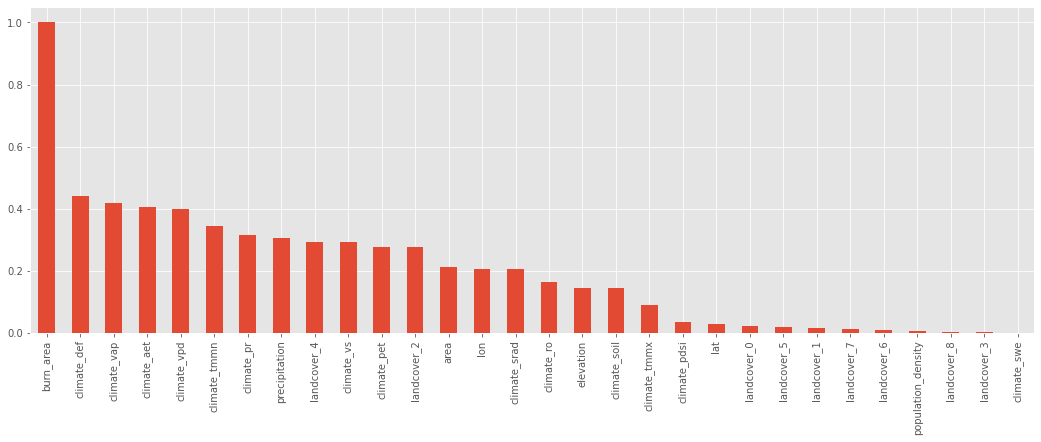

In [19]:
abs(train.corr()['burn_area']).sort_values(ascending=False).plot(kind='bar', figsize=(18, 6))

###Multivariate Analysis

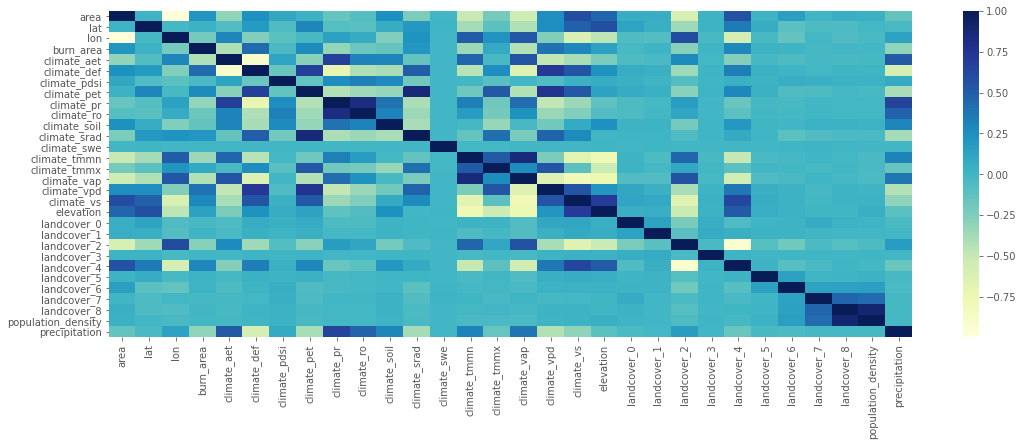

In [20]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(corr, cmap="YlGnBu", ax=ax)

**Scatter plots**


##  Adding date features

**Create categorical variable for month likelihood of fire**

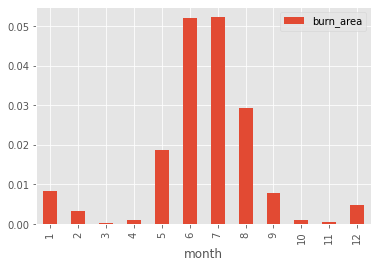

In [33]:
# Date variables
train['month'] = train.date.dt.month
train['year'] = train.date.dt.year

# Add the same features to test as we did to train:
test['month'] = test.date.dt.month
test['year'] = test.date.dt.year

# Plotting mean burn_area for each month - very strong mid-year peak (dry season)
train.groupby('month').mean().reset_index().plot(y='burn_area', x='month', kind='bar')

**Create categorical data for seasons**

In [0]:
seasons = [1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1]
month_to_season = dict(zip(range(1,13), seasons))

train['season']=train.month.map(month_to_season) 
test['season']=test.month.map(month_to_season) 

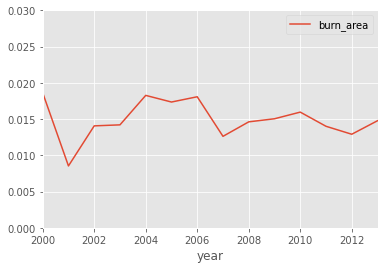

In [23]:
# Plot trend year-on-year
train.groupby('year').mean().reset_index().plot(y='burn_area', x='year', ylim=(0, 0.03))

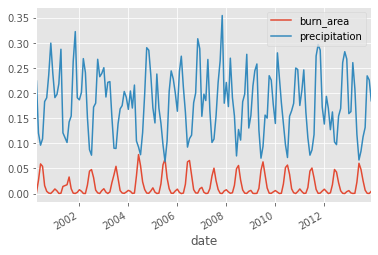

In [25]:
# Let's plot precipitation and burn area on the same plot - note the inverse relationship, and the strong periodic component to both.
ax = train.groupby('date').mean().reset_index().plot(y='burn_area', x='date')
train.groupby('date').mean().reset_index().plot(y='precipitation', x='date', ax=ax)

**Precipitation Feature**

In [0]:
a = pd.qcut(train['climate_pr'], q=2)
a

In [0]:

## binning the precipitation
bins = [-0.001, 129.643, 1111.882]
labels = [1,2]

# Not improving accuracy hence remove it
'''
train['is_peak_rainfall'] = pd.cut(train['climate_pr'], bins=bins, labels=labels).astype(int)
train
'''

In [0]:
b = pd.qcut(test['climate_pr'], q=2)
b

In [0]:
## binning the precipitation
bins = [-0.001, 115.504, 597.041]
labels = [1,2]

# Not improving accuracy hence remove it
'''
test['is_peak_rainfall'] = pd.cut(test['climate_pr'], bins=bins, labels=labels).astype(int)
test
'''

# Data Split for Validation

In [0]:
#train_all = train.copy().dropna()
train_all = train
train = train_all.loc[train_all.date < '2011-01-01']
valid = train_all.loc[train_all.date > '2011-01-01']
print(train.shape, valid.shape)
train_all.info()

##Build Models

###Train and validation splits

In [38]:
# Define input and output columns
in_cols = train.columns[6:]
target_col = 'burn_area'
in_cols

Index(['climate_aet', 'climate_def', 'climate_pdsi', 'climate_pet',
       'climate_pr', 'climate_ro', 'climate_soil', 'climate_srad',
       'climate_swe', 'climate_tmmn', 'climate_tmmx', 'climate_vap',
       'climate_vpd', 'climate_vs', 'elevation', 'landcover_0', 'landcover_1',
       'landcover_2', 'landcover_3', 'landcover_4', 'landcover_5',
       'landcover_6', 'landcover_7', 'landcover_8', 'population_density',
       'precipitation', 'month', 'year', 'season'],
      dtype='object')

In [0]:
# Get our X and y training and validation sets ready
X_train, y_train = train[in_cols], train[target_col]
X_valid, y_valid = valid[in_cols], valid[target_col]

###Models

In [0]:
# Family of trees performing best, comment out the rest to reduce training time
models = []
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('Bag_Re', BaggingRegressor()))
'''
models.append(('Linear regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Ridge CV', RidgeCV()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVM', SVR()))
'''

**Build models and evaluate their performance**

In [0]:
# Evaluations
results = []
names = []

# Code commented out as it takes long to run
'''
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_valid)
    
    # Evaluate the model
    rmse = mean_squared_error(predictions, y_valid, squared=False)

    results.append(rmse)
    names.append(name)
    
    msg = "%s: %f " % (name, rmse)
    print(msg)
'''

####Voting regresssor

**Ensemble model of RandomForest and VotingRegressor as they were the best performers**

In [0]:
# Commented out as it doesn't improve accuracy
forest = RandomForestRegressor()
extra = ExtraTreesRegressor()

'''
er = VotingRegressor([('ef', extra), ('rf', forest)])

er.fit(X_train, y_train)

predictions = er.predict(X_valid)
    
# Evaluate the model
rmse = mean_squared_error(predictions, y_valid, squared=False)
rmse
 '''   

**Test ExtraTreesRegressor Model**

In [42]:
# Create and fit the model
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
    
predictions = model.predict(X_valid)
    
# Evaluate the model
rmse = mean_squared_error(predictions, y_valid, squared=False)
rmse

0.032002588222244395

####Parameter Tuning

**Todo: Implement GridSearchCV**

**Build Model**

In [43]:
# Create and fit the model
model = ExtraTreesRegressor()
model.fit(train_all[in_cols], train_all[target_col])

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

**Submission file**

In [44]:
# Look at the sample submission file
ss = pd.read_csv('SampleSubmission.csv')
ss.head()

,ID,Prediction
0,0_2014-01-01,0
1,1_2014-01-01,0
2,2_2014-01-01,0
3,3_2014-01-01,0
4,4_2014-01-01,0


**Make Prediction**

In [45]:
# Get predictions
preds = model.predict(test[in_cols])

# Add to submission dataframe
ss['Prediction'] = preds

# View
ss.head()

,ID,Prediction
0,0_2014-01-01,0.159157
1,1_2014-01-01,0.141043
2,2_2014-01-01,0.252244
3,3_2014-01-01,0.217899
4,4_2014-01-01,0.300206


In [0]:
# Save ready for submission:
ss.to_csv('sheila_extra_trees.csv', index=False)